# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 4а

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **27 марта в 22:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и все фотографии, если пишете теоретическую часть от руки.
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

*Замечания.* Теоретические решения можно оформить
* в $\LaTeX$-формате в ноутбуке;
* написать от руки и прикрепить к ноутбуку;
* написать от руки и выслать боту.  

Во втором случае также **важно** "вшить" фото в ноутбук. Сделать это можно с помощью Edit -> Insert Image в Jupyter или с помощью кнопки "Вставить изображение" в Colab. Следите за размером итогового файла.

Фотографии принимаются только в хорошем качестве, **следите за освещением и почерком**. На фотографиях также указывайте номера задач.

-----

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'


#Теоретическая часть

1. 3 балла В 1963 году на одном из самолетов модели Boeing 720 были проведены измерения
времени между поломками системы кондиционирования (в часах):
 
 `487, 18, 100, 7, 98, 5, 85, 91, 43, 230, 3, 130`

 Данные хорошо описываются экспоненциальным распределением с параметром $\theta > 0$. Нахождение точечной и интервальной оценок $\theta$ имеет практическое применение.

 Пусть 

  $X_1,\ldots,X_n$ &mdash; выборка из экспоненциального распределения с параметром $\theta$, т.е. $p_\theta(x) = \theta e^{-\theta x}I(x>0)$.

 Найдите точный доверительный интервал для параметра $\theta$ уровня доверия $\alpha$ с помощью метода центральной функции. 
 
 Посчитайте реализацию доверительного интервала на предложенных данных, положив $\alpha = 0.95$.

 *Замечание. Экспоненциальное распределение также хорошо описывает время между соседними появлениями частицы на детекторе.*

2. 5 баллов Пусть

 а) $X_1,\ldots,X_n$ &mdash; координаты пересечении гамма-лучей с горизонтальной прямой, являющиеся выборкой из распределения
	Коши со сдвигом, т.е.
	$
	p_{\theta}(x)=\frac 1{\pi(1+(x-\theta)^2)}.
	$

  б) $X_1,\ldots,X_n$ &mdash; выборка из
	гамма-распределения с параметрами $(\theta,\beta)$, $\beta$ известно.

	Постройте асимптотический доверительный интервал для $\theta$
	уровня доверия $\alpha$.


1)

$\mu = \frac1\lambda; \sigma^2 = \frac{1}{\lambda^2}$

Найдем центральную функцию по ЦПТ:

$G(X, \theta) = \sqrt{n} \frac{\overline{X_n} - \frac1\lambda}{\frac1\lambda} \sim \mathcal{N}(0, 1)$

Тогда, по методу центральной функции: $P_\theta (z_{\frac{1-\alpha}{2}} < \sqrt{n} (\lambda \overline{X_n} -1) < z_{\frac{1+\alpha}{2}})$

Доверительный интервал: $\Bigg(\frac{\frac{z_{\frac{1-\alpha}{2}}}{\sqrt{n}} + 1}{\overline{X_n}}; \frac{\frac{z_{\frac{1+\alpha}{2}}}{\sqrt{n}} + 1}{\overline{X_n}} \Bigg)$

При $\alpha = 0.95$ нам нужны квантили $z_{\frac{1+\alpha}{2}} = 1.96; z_{\frac{1-\alpha}{2}} = -1.96$

Для нашего примера с конкретными числами: $n = 12, \overline{X_n} = 108.083$

Доверительный интервал уровня доверия $\alpha = 0.95$: (0.004, 0.014). 


2)

а) $p_{\theta}(x)=\frac 1{\pi(1+(x-\theta)^2)}$

Медиана является АНО параметра $\theta$ с асимптотической дисперсией $\frac{\pi^2}{4}$ (по формуле $\sigma^2 = \frac{1}{4 p^2 (x_{1/2})}$). Поэтому доверительный интервал уровня доверия $\alpha$ будет выглядеть так:

$\Bigg(  MED - \frac{z_{\frac{1+\alpha}{2}} \frac\pi2}{\sqrt{n}};  MED + \frac{z_{\frac{1+\alpha}{2}} \frac\pi2}{\sqrt{n}} \Bigg)$

б) $p_{\theta}(x) = \frac{\theta^{\beta} x^{\beta-1}}{\Gamma(\beta)} e^{-\theta x} $

Оценка макисмального правдоподобия является АНО и состоятельной: $\hat\theta = \frac{\beta}{\overline x}$

Асимпт. дисперсия ОМП: $D = \frac{\theta^2}{\beta}$. $D_n = \frac{\beta}{\overline{X_n}^2}$

Тогда доверительный интервал уровня доверия $\alpha$ будет выглядеть так:

$\Bigg( \frac{\beta}{\overline{X_n}} - \frac{z_{\frac{1+\alpha}{2}} \frac{\sqrt{\beta}}{\overline{X_n}}}{\sqrt{n}}; \frac{\beta}{\overline{X_n}} + \frac{z_{\frac{1+\alpha}{2}} \frac{\sqrt{\beta}}{\overline{X_n}}}{\sqrt{n}}  \Bigg)$




# Практическая часть


### Задача 3 .

10 баллов

В этой задаче нужно визуализировать доверительные интервалы. 

Рассмотрим пример построения доверительного интервала для оценки $\theta$ для выборки из $\mathcal{N}(\theta, 1)$. Приведенный ниже код строит график зависимости оценки $\overline{X}$, а также границ доверительного интервала $\left(\overline{X} - \frac{2}{\sqrt{n}}, \overline{X} + \frac{2}{\sqrt{n}}\right)$ от размера выборки $n$. В примере рассматривается реализация выборки размера 200 из стандартного нормального распределения и построенные по всем начальным подвыборкам оценка и доверительный интервал.



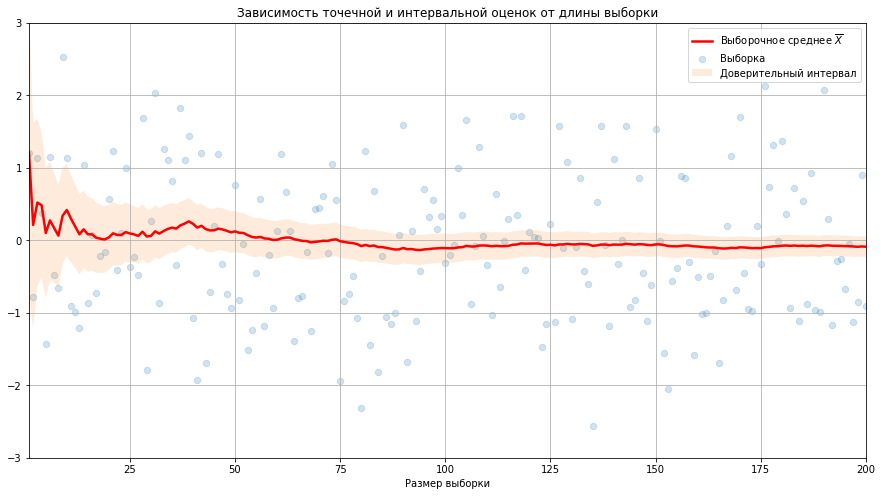

In [2]:
sample = sps.norm.rvs(size=200)  # выборка

time = np.arange(1, 201)
means = sample.cumsum() / np.arange(1, 201)  # оценка

plt.figure(figsize=(15, 8))
plt.scatter(time, sample, alpha=0.2, s=40, label='Выборка')  # s - размер точек
plt.plot(time, means, color='red', linewidth=2.5, label='Выборочное среднее $\overline{X}$')  # linewidth - толщина линии

# заполняет пространство между двумя функциями
plt.fill_between(time, means + 2 / np.sqrt(time), means - 2 / np.sqrt(time), label = 'Доверительный интервал', alpha=0.15)

plt.legend()
plt.xlim((1, 200))  # размеры графика по горизонтальной оси (ставим None, если по стороне ограничений нет)
plt.ylim((-3, 3))  # размеры графика по вертикальной оси 
plt.xlabel('Размер выборки')  # название горизонтальной оси (аналогично plt.ylabel)
plt.title('Зависимость точечной и интервальной оценок от длины выборки')  # имя графика
plt.grid()  # добавляем сетку
plt.show()

Чтобы не плодить код, напишите следующую функцию (см. ниже). Можете опираться на пример выше. При выборе стиля графика помните, что если изображаются лишь точки и линии, то лучше использовать серый фон, а если присутствуют закрашенные области, то предпочтительнее белый. Графики первого типа еще называют "легкими", а второго — "тяжелыми".


In [3]:
# Из шаблоны были методы plt.figure() и plt.show(), чтобы была возможность строить графики на одном поле. 
# В аргументы функцци добавлено label_interval и show_sample

def draw_confidence_interval(
    left=None, right=None, estimation=None, sample=None, 
    ylim=(None, None), color_estimation='#FF3300', color_interval='#00CC66', 
    color_sample='#0066FF', label_estimation='Оценка', label_interval='Дов. инт.', 
    show_sample=True
):
    """
    Рисует доверительный интервал и оценку в зависимости от размера выборки.
    
    :param label_interval: подпись для интервала
    :param show_sample: опция отображения точек
    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param color_estimation: цвет оценки
    :param color_interval: цвет интервала
    :param color_sample: цвет выборки
    :param label_estimation: подпись для оценки

    Функция ничего не возвращает.
    """
    time = np.arange(1, sample.size+1)

#     plt.figure(figsize=(15, 8))
    if show_sample:
        plt.scatter(time, sample, color=color_sample, alpha=0.2, s=40, label='Выборка')  # s - размер точек
    plt.plot(time, estimation, color=color_estimation, linewidth=1.5, label=label_estimation, alpha = 0.8)  # linewidth - толщина линии

    # заполняет пространство между двумя функциями
    
    assert ((right is not None and right.size==left.size) or (right is None and left is None)), 'Нельзя указывать только одну границу интервалов, массивы границ должны быть одинаковой длины'
    ax = plt.axes()
    if right is not None and right.size==left.size:
        ax.set_facecolor((1, 1, 1))
        plt.fill_between(time, right, left, color=color_interval, label = label_interval, alpha=0.15)
    elif right is None and left is None:
        ax.set_facecolor((0.8, 0.8, 0.8))

    
    
    plt.legend(loc='upper right', framealpha=0.5)
    plt.xlim((1, sample.size))
    plt.ylim(ylim)
    plt.xlabel('Размер выборки')
    plt.title('Зависимость точечной и интервальной оценок от длины выборки')
    plt.grid()
#     plt.show()
    
    

Рассмотрим выборку $X_1, ... X_{100}$ из стандартного распределения Коши и  доверительные интервалы для следующих случаев

* точный доверительный интервал в параметрической модели $\mathcal{N}(\theta, 1)$ *&mdash; выведен на лекции 5, см. замечание ниже*;
* точный асимптотический доверительный интервал в параметрической модели распределения Коши со сдвигом, используя выборочную медиану в качестве асимптотически нормальной оценки;
* точный асимптотический доверительный интервал в параметрической модели распределения Коши со сдвигом, используя асимптотически эффективную оценку *, т.е имеющую наименьшую асимптотическую дисперсию. Вспомните лекцию 4 и прошлое ДЗ. Значение ее асимптотической дисперии можно взять с лекции без пояснений*.

Последние два интервала постройте с помощью метода построения асимптотических доверительных интервалов с лекции 5. Наверняка, какой-то из них у вас уже получился в теоретической части ДЗ. 

*Замечание.*

Первый пример призван проиллюстрировать, что бывает, если используется неправильная модель. На практике вы никогда не знаете, из какого семейства распределений на самом деле получены данные.

Выпишите формулы для всех используемых интервалов.







**Ответ:** для  уровня доверия $\alpha$
1) Точный доверительный интервал для $\hat{\theta} = \overline{X_n} $ (среднее по выборке): $\left(\overline{X} - \frac{z_{\frac{1+\alpha}{2}}}{\sqrt{n}}, \overline{X} + \frac{z_{\frac{1+\alpha}{2}}}{\sqrt{n}}\right)$
2) Асимптотический доверительный интервал для $\hat{\theta} = MED$ (медиана по выборке): $\Bigg(  MED - \frac{z_{\frac{1+\alpha}{2}} \frac\pi2}{\sqrt{n}};  MED + \frac{z_{\frac{1+\alpha}{2}} \frac\pi2}{\sqrt{n}} \Bigg)$
3) Сама асимпт. эфф оценка (одношаговая оценка по медиане по выборке): $MED_1 = MED + \left(\sum\limits_{i=1}^n \frac{X_i - MED}{1 + (X_i - MED)^2}\right)/\left(\sum\limits_{i=1}^n \frac{1 - (X_i - MED)^2}{(1 + (X_i - MED)^2)^2}\right)$

Асимптотическая дисперсия этой оценки: $\mathcal{D} = 2$

Асимптотический доверительный интервал: $\left(MED_1 - \frac{z_{\frac{1+\alpha}{2}} \sqrt{2}}{\sqrt{n}}; MED_1 + \frac{z_{\frac{1+\alpha}{2}} \sqrt{2}}{\sqrt{n}} \right)$


***

Для каждой ситуации из перечисленных выше сгенерируйте выборку $X_1, ... X_{100}$ из стандартного распределения Коши и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок вида $X_1, ... X_i$, $1 \le i \le 100$.

Постройте графики зависимости верхних и нижних границ интервала от размера выборки, используя написанную функцию. Нужно нанести на график точки выборки.
Для вычисления квантилей у каждого распределения из `scipy.stats` используйте функцию `ppf`.

*Замечание.*

Выборку надо сгенерировать один раз. Дело в том, что на практике при недостаточном размере выборки разумнее дособрать выборку, чем заново проводить все измерения.

Изобразите интервалы *на одном* графике полупрозрачными цветами. Точки выборки нужно нанести на график. 



In [5]:
N = 100
a = 0.95

# генерирую выборку
data = sps.cauchy.rvs(size=N)
grid = np.arange(1, N+1)

# среднее по префиксам и границы интервалов
cum_mean = np.cumsum(data)/grid
# left_mean = right_mean =  sps.norm.ppf((1+a)/2)/(grid**0.5)
left_mean = cum_mean - sps.norm.ppf((1+a)/2)/(grid**0.5)
right_mean = cum_mean + sps.norm.ppf((1+a)/2)/(grid**0.5)

# медиана и границы интервалов
med = np.array([np.median(data[:i+1]) for i in range(data.size)])
# left_med = right_med =  sps.norm.ppf((1+a)/2) * (np.pi/2)/(grid**0.5)
left_med = med - sps.norm.ppf((1+a)/2) * (np.pi/2)/(grid**0.5)
right_med = med + sps.norm.ppf((1+a)/2) * (np.pi/2)/(grid**0.5)


In [6]:
# одношаговая оценка по выборочной медиане и границы интервалов
med1 = np.zeros(N)
grid = np.arange(1, N+1)
for i in range(N):
    x = data[:i+1]
    
    numerator_arr = (x - med[i])/(1 + (x - med[i])**2)

    numerator = np.sum(numerator_arr)
    
    denominator_arr = (1 - (x - med[i])**2)/((1 + (x - med[i])**2)**2)
    denominator = np.sum(denominator_arr)
    med1[i] = med[i] + numerator/denominator
    
# left_med1 = right_med1 =  sps.norm.ppf((1+a)/2) * (np.sqrt(2))/(grid**0.5)
left_med1 = med1 - sps.norm.ppf((1+a)/2) * (np.sqrt(2))/(grid**0.5)
right_med1 = med1 + sps.norm.ppf((1+a)/2) * (np.sqrt(2))/(grid**0.5)

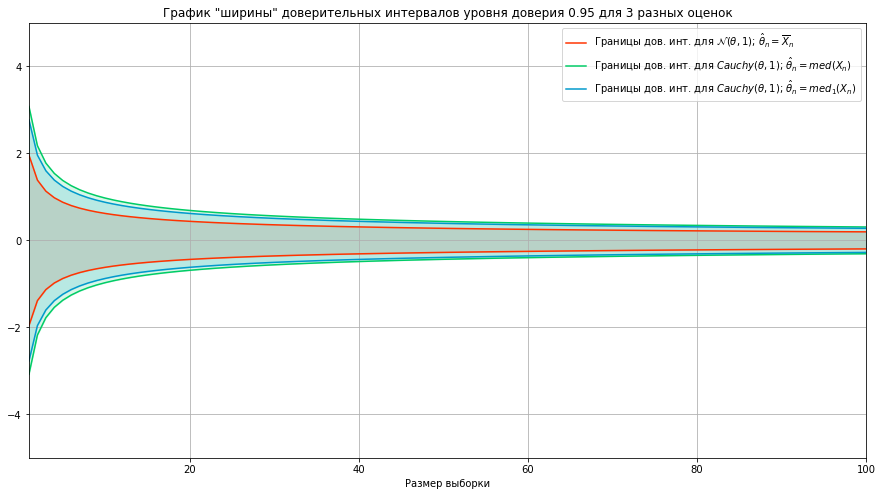

In [7]:
# графики дов. интервалов


plt.figure(figsize=(15, 8))
plt.grid()

plt.fill_between(grid, left_mean-cum_mean, right_mean-cum_mean, alpha=0.15, color=red)
plt.fill_between(grid, left_med-med, right_med-med, alpha=0.15, color=green)
plt.fill_between(grid, left_med1-med1, right_med1-med1, alpha=0.15, color=blue)

plt.plot(grid, left_mean-cum_mean, label = 'Границы дов. инт. для $\\mathcal{N} (\\theta, 1)$; $\\hat{\\theta}_n = \\overline{X}_n$', alpha=1, color=red)
plt.plot(grid, left_med-med,  label = 'Границы дов. инт. для $Cauchy(\\theta, 1)$; $\\hat{\\theta}_n = med(X_n)$', alpha=1, color=green)
plt.plot(grid, left_med1-med1, label = 'Границы дов. инт. для $Cauchy(\\theta, 1)$; $\\hat{\\theta}_n = med_1(X_n)$', alpha=1, color=blue)

plt.plot(grid, right_mean-cum_mean, alpha=1, color=red)
plt.plot(grid, right_med-med, alpha=1, color=green)
plt.plot(grid, right_med1-med1, alpha=1, color=blue)



plt.legend()
plt.xlim((1, N))
plt.ylim((-5, 5)) 
plt.xlabel('Размер выборки') 
plt.title('График "ширины" доверительных интервалов уровня доверия 0.95 для 3 разных оценок') 

plt.show()


<ipython-input-3-71df12c8f947>:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


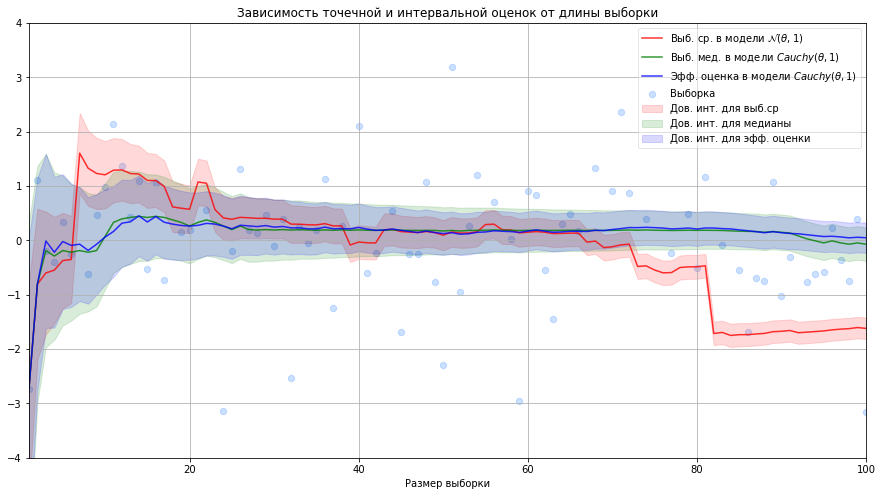

In [8]:
plt.figure(figsize=(15, 8))
ylim = (-4, 4)

draw_confidence_interval(
    left=left_mean, right=right_mean, estimation=cum_mean, sample=data, 
    ylim=ylim, color_estimation='#FF0000', color_interval='#FF0000', 
    color_sample='#0066FF', label_estimation='Выб. ср. в модели $\\mathcal{N} (\\theta, 1)$', label_interval='Дов. инт. для выб.ср',
    show_sample=True
)

draw_confidence_interval(
    left=left_med, right=right_med, estimation=med, sample=data, 
    ylim=ylim, color_estimation='#008000', color_interval='#008000', 
    color_sample='#0066FF', label_estimation='Выб. мед. в модели $Cauchy(\\theta, 1)$', label_interval='Дов. инт. для медианы',
    show_sample=False
)

draw_confidence_interval(
    left=left_med1, right=right_med1, estimation=med1, sample=data, 
    ylim=ylim, color_estimation='#0000FF', color_interval='#0000FF', 
    color_sample='#0066FF', label_estimation='Эфф. оценка в модели $Cauchy(\\theta, 1)$', label_interval='Дов. инт. для эфф. оценки',
    show_sample=False
)

plt.show()

Сравните полученные интервалы.

**Вывод:** 

Видно, что выборочное среднее плохо оценивает параметр сдвига в распределении Коши. Так как в этой модели выборочное среднее распределено по распределению Коши. Значит, предположение о "нормальности" выборки оказалось неверным. А значит и о доверительном интервале для такой оценки говорить некорректно (т.к. доверительный интервал определяется для распределения Коши ( в данной задаче) с неизвестным параметром сдвига, а не нормального распределения с неизвестным параметром сдвига), даже несмотря на его кажущуюся малую ширину.

Выборочная медиана и эфф. оценка куда больше подходять для оценивания параметра. Они являются асимпт. нормальными. Асимпт дисперсия эффективной оценки меньше, чем асимт дисперсия выборочной медианы (2 против 2,47). Поэтому ширина доверительного интервала для эффективной оценки меньше чем для выб. медианы.

Значит, эффективная оценка подходит больше для оценивания парамтра сдвига в распределении Коши.